In [18]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
plt.style.use(plt.style.available[24])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the xtick labels
plt.rc('ytick', labelsize=12)     # fontsize of the ytick labels (also applies to colorbar)
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title
plt.rc('axes', titlesize=14)
plt.rc('lines', linewidth=2)     # line width
plt.rc('figure', figsize=(6, 5)) # figure size
plt.rc('axes', axisbelow=True)

In [2]:
models = ['POLY', 'SVGP', 'NN']
betas = [0, 0.25, 0.5, 0.75, 1]
cutoffs = [1, 1.5]
X_grid = np.load('results/Xgrid.npy')
y_grid = np.load('results/Ygrid.npy')
data = np.zeros((len(models), len(betas), len(cutoffs), X_grid.shape[0], X_grid.shape[1]))
for i, model in enumerate(models):
    for j, beta in enumerate(betas):
        for k, cutoff in enumerate(cutoffs):
            data[i, j, k] = np.load(f'results/{model}_beta={beta}_cutoff={cutoff}.npy')

X_grid_fuchs = np.load('results/FUCHS_Xgrid.npy')[30:]
y_grid_fuchs = np.load('results/FUCHS_Ygrid.npy')[30:]
fuchs_data = np.zeros((len(betas), len(cutoffs), X_grid_fuchs.shape[0], X_grid_fuchs.shape[1]))
for j, beta in enumerate(betas):
    for k, cutoff in enumerate(cutoffs):
        fuchs_data[j, k] = np.load(f'results/FUCHS_beta={beta}_cutoff={cutoff}.npy')[30:]

In [3]:
print(fuchs_data.shape)
print(y_grid_fuchs.shape)

(5, 2, 31, 10)
(31, 10)


In [4]:
opt_indices = np.zeros((len(models), len(betas), len(cutoffs)), dtype=tuple)
opt_fuchs_indices = np.empty((len(betas), len(cutoffs)), dtype=tuple)
for i, model in enumerate(models):
    for j, beta in enumerate(betas):
        for k, cutoff in enumerate(cutoffs):
            current_opt = np.unravel_index(np.argmin(data[i, j, k]), data[i, j, k].shape)
            opt_indices[i, j, k] = current_opt
for j, beta in enumerate(betas):
    for k, cutoff in enumerate(cutoffs):
        current_opt = np.unravel_index(np.argmin(fuchs_data[j, k]), fuchs_data[j, k].shape)
        print(f'opt: {current_opt}, coordinate: ({X_grid_fuchs[current_opt]}, {y_grid_fuchs[current_opt]}), val: {fuchs_data[j, k][current_opt]}')
        opt_fuchs_indices[j, k] = current_opt

opt: (11, 0), coordinate: (0.5, 11.0), val: -2.8912884644523644
opt: (11, 0), coordinate: (0.5, 11.0), val: -2.8912884644523644
opt: (10, 0), coordinate: (0.5, 9.999999999999996), val: -1.8907195669350094
opt: (10, 0), coordinate: (0.5, 9.999999999999996), val: -2.0157195669350094
opt: (8, 0), coordinate: (0.5, 7.999999999999995), val: -0.8935229916199308
opt: (8, 0), coordinate: (0.5, 7.999999999999995), val: -1.1435229916199308
opt: (2, 6), coordinate: (3.5, 1.9999999999999978), val: -0.3016194655973893
opt: (0, 1), coordinate: (1.0, -3.3881317890172014e-15), val: -0.5039923097762152
opt: (17, 7), coordinate: (4.0, 16.999999999999996), val: 0.000401070056359476
opt: (16, 3), coordinate: (2.0, 16.0), val: 0.004120170235849985


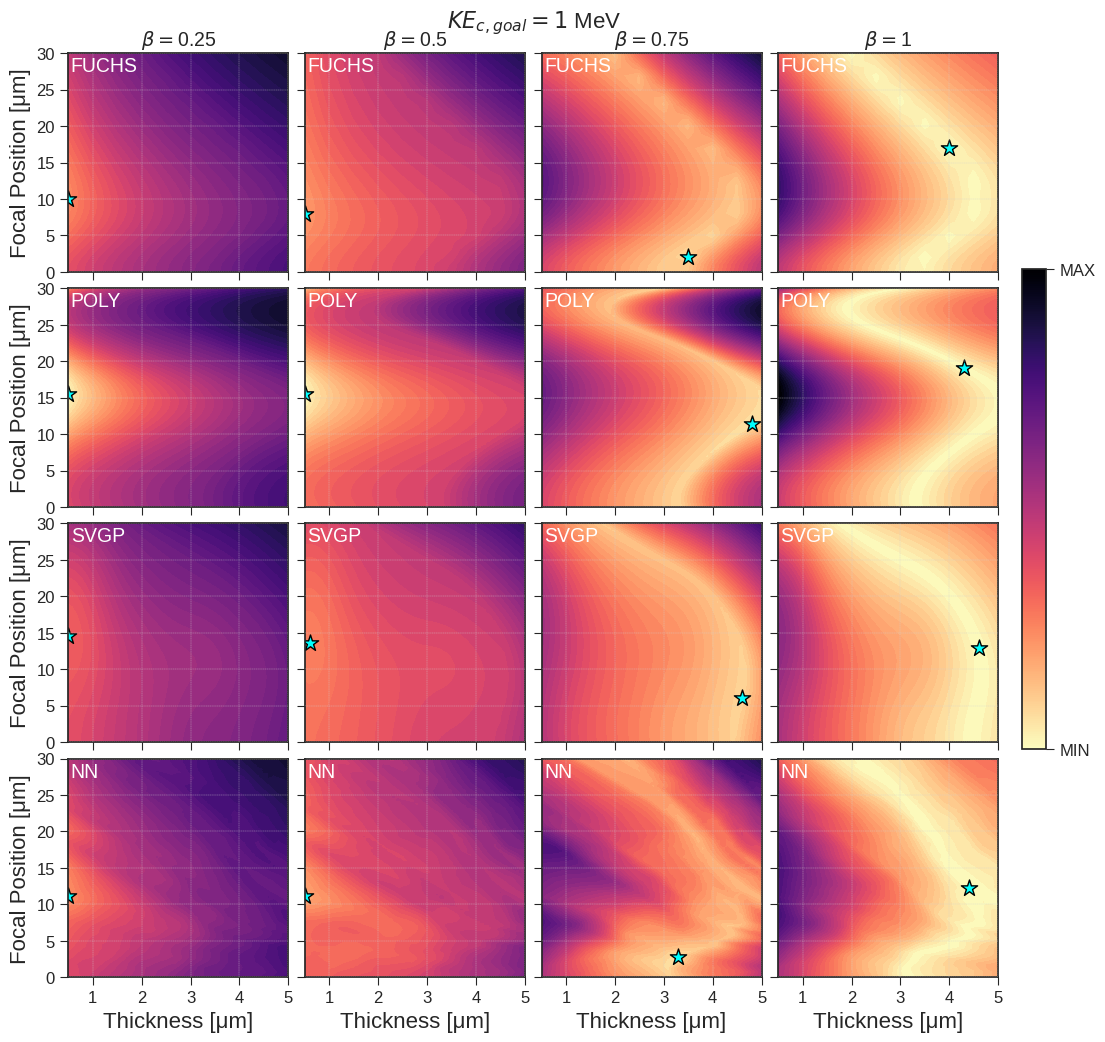

In [22]:
cutoff_idx = 0
cmap='magma_r'
spacing = 0.075
xticks = np.arange(1, 5.1, 1)
yticks = np.arange(0, 31, 5)
levels = [np.linspace(-3.75, 0, 51), 
            np.linspace(-2.5, 0, 51), 
            np.linspace(-1.2, 0.2, 51), 
            np.linspace(-0.35, 0.3, 51), 
            np.linspace(0, 1.38, 51)]
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for j, beta in enumerate(betas[1:]):
    axs[0, j].contourf(X_grid_fuchs, y_grid_fuchs, fuchs_data[j+1, cutoff_idx], cmap=cmap, levels=levels[j+1])
    axs[0, j].text(0.55, 27.5, 'FUCHS', fontsize=14, color='white')
    axs[0, j].set_title(r'$\beta = $' + str(beta))
    axs[0, j].set_ylim(0, 30)
    axs[0, j].scatter(X_grid_fuchs[opt_fuchs_indices[j+1, cutoff_idx]], y_grid_fuchs[opt_fuchs_indices[j+1, cutoff_idx]], marker='*', color='cyan', s=150, edgecolors='black')

norm = Normalize(vmin=np.min(levels[1]), vmax=np.max(levels[1]))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.75, 0.3, 0.2, 0.4])
cbar = fig.colorbar(sm, ax=cbar_ax)
cbar.set_ticks([np.min(levels[1]), np.max(levels[1])])
cbar.set_ticklabels(['MIN', 'MAX'])
cbar_ax.axis('off')
#cbar.outline.set_visible(False)
axs[0, 0].set_ylabel('Focal Position [μm]')
for i in range(4):
    for j in range(4):
        if j > 0:
            axs[i, j].set_yticklabels([])
        axs[i, j].grid(True, color='lightgray', linestyle='dashed', linewidth=0.25)
        axs[i, j].set_axisbelow(False)
        axs[i, j].set_xticks(xticks)
        axs[i, j].set_yticks(yticks)
for i, model in enumerate(models):
    for j, beta in enumerate(betas[1:]):
        axs[i+1, j].contourf(X_grid, y_grid, data[i, j+1, cutoff_idx], cmap=cmap, levels=levels[j+1])
        axs[i+1, j].scatter(X_grid[opt_indices[i, j+1, cutoff_idx]], y_grid[opt_indices[i, j+1, cutoff_idx]], marker='*', color='cyan', s=150, edgecolors='black')
        axs[i+1, j].text(0.55, 27.5, model, fontsize=14, color='white')
        axs[i, j].set_xticklabels([])
        axs[3, j].set_xlabel('Thickness [μm]')
    axs[i+1, 0].set_ylabel('Focal Position [μm]')

axs[0, 0].text(8.25, 33.5, '$KE_{c, goal} = 1$ MeV', fontsize=16)

for j in range(4):
    axs[3, j].set_xticks(np.arange(1, 5.1, 1))
fig.subplots_adjust(wspace=spacing, hspace=spacing)
fig.savefig('plots/obj_fn_model_cutoff=1.eps', format='eps', bbox_inches='tight')

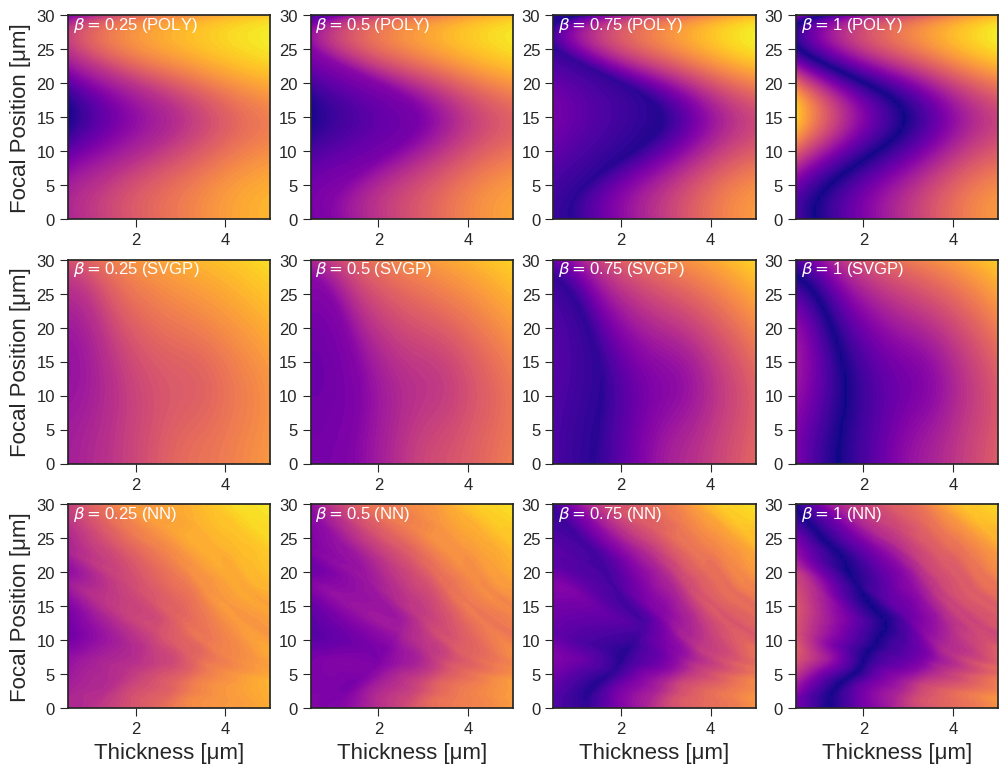

In [122]:
cutoff_idx = 1
levels = [np.linspace(-3.75, 0, 76), 
            np.linspace(-2.6, 0, 76), 
            np.linspace(-1.45, 0.35, 76), 
            np.linspace(-0.55, 0.65, 71), 
            np.linspace(0, 1, 76)]
fig, axs = plt.subplots(3, 4, figsize=(12, 9))
for i, model in enumerate(models):
    for j, beta in enumerate(betas[1:]):
        axs[i, j].contourf(X_grid, y_grid, data[i, j+1, cutoff_idx], cmap='plasma', levels=levels[j+1])
        axs[i, j].text(0.6, 28, r'$\beta = $' + str(beta) + f' ({model})', fontsize=12, color='white')
        axs[2, j].set_xlabel('Thickness [μm]')
    axs[i, 0].set_ylabel('Focal Position [μm]')